# Lecture 04 - Applications of Numpy

## Image manipulation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
face = misc.face(gray=True)
face

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

C:\Users\kimso\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


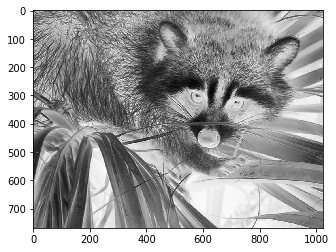

In [7]:
plt.imshow(255-face,cmap=plt.cm.gray)

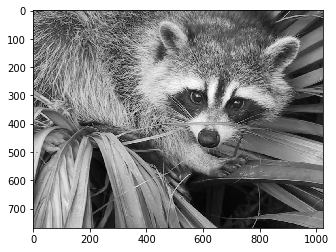

In [4]:
plt.imshow(face, cmap=plt.cm.gray)

Modify this image, e.g. convert it to a black and white image, put a black frame, change the contrast, ...

C:\Users\kimso\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


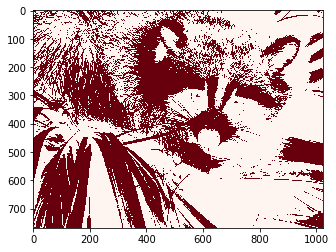

In [8]:
plt.imshow(face > 128, cmap=plt.cm.Reds)

C:\Users\kimso\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


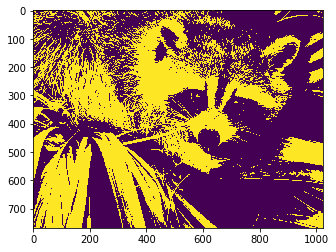

In [10]:
plt.imshow(face > 128)

C:\Users\kimso\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


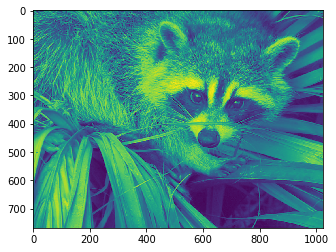

In [11]:
plt.imshow(face)

C:\Users\kimso\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


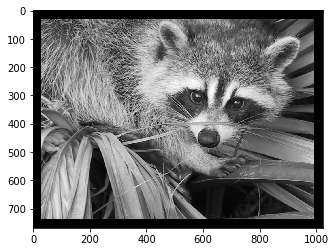

In [4]:
framedface = np.zeros_like(face)
framedface[30:-31, 30:-31] = face[30:-31, 30:-31]
plt.imshow(framedface, cmap=plt.cm.gray)

C:\Users\kimso\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


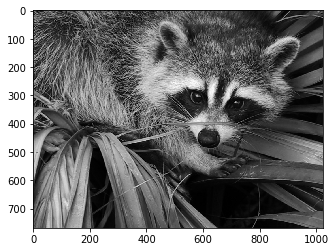

In [12]:
plt.imshow(255*(face/255)**1.5, cmap=plt.cm.gray)

C:\Users\kimso\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


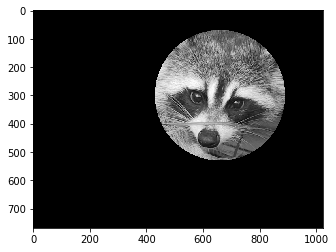

In [13]:
sy, sx = face.shape
y, x = np.ogrid[:sy, :sx]
centerx, centery = 660, 300
mask = ((y - centery)**2 + (x - centerx)**2) > 230**2
face[mask] = 0
plt.imshow(face, cmap=plt.cm.gray)

## Polynomials

In [15]:
from numpy.polynomial import polynomial as P

Powers increase from left to right (index corresponds to power)

In [ ]:
p1 = P.Polynomial([1, 2])

In [ ]:
p1.degree()

In [ ]:
p1.roots()

In [ ]:
p4 = P.Polynomial([24, -50, 35, -10, 1])

In [ ]:
p4.degree()

In [ ]:
p4.roots()

In [ ]:
p4.deriv()

In [ ]:
p4.integ()

In [ ]:
P.polydiv(p4.coef, p1.coef)

## Application: polynomial fit

C:\Users\kimso\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


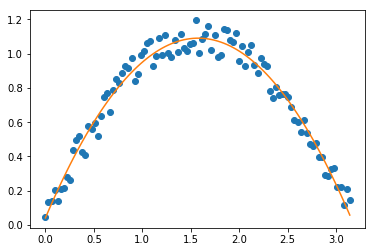

In [16]:
x = np.linspace(0, np.pi, 100)
y = np.sin(x)+0.2*np.random.rand(100)
plt.plot(x, y, 'o')
fit = P.Polynomial(P.polyfit(x, y, 2))
plt.plot(x, fit(x))

## Linear Algebra in NumPy

In [28]:
import numpy.linalg as LA
import scipy.linalg as la


In [ ]:
a = np.arange(4).reshape(2, 2)
print(a)
eigenvalues, eigenvectors = LA.eig(a)
eigenvalues

In [ ]:
eigenvectors

Explore whether the eigenvectors are the rows or the columns.

In [ ]:
a @ eigenvectors[:, 0]

In [ ]:
eigenvalues[0]*eigenvectors[:, 0]

In [17]:
np.random.rand(4,3) @ np.random.rand(3,2)

array([[0.74579522, 0.482676  ],
       [0.82809458, 0.29792648],
       [0.90717125, 0.78825418],
       [1.05108296, 0.43949847]])

In [20]:
A = np.ones((4,3))
B = np.ones((3,5))

In [21]:
np.matmul(A, B)

array([[3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.]])

In [22]:
A @ B

array([[3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.]])

In [23]:
M = np.array([[3,4],[-1,5]])
print(M)

[[ 3  4]
 [-1  5]]


In [24]:
M @ M @ M@ M

array([[-231,  832],
       [-208,  185]])

In [29]:
LA.matrix_power(M,4)

array([[-231,  832],
       [-208,  185]])

In [30]:
print(M.T)

[[ 3 -1]
 [ 4  5]]


In [31]:
M@M.T

array([[25, 17],
       [17, 26]])

In [32]:
LA.inv(M)


array([[ 0.26315789, -0.21052632],
       [ 0.05263158,  0.15789474]])

## Statistics with Numpy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
## Generate a 5 by 2 matrix whose elements are random numbers 0 to 1 
# Run multiple times
np.random.rand(5, 2)

In [ ]:
## Generate a 5 by 2 matrix whose elements are random numbers 0 to 1 
## Use a random seed and run multiple times
np.random.seed(1234)
np.random.rand(5, 2)

In [ ]:
## Plot a histogram of 10000 random numbers between 0 and 1
plt.hist(np.random.rand(10000),bins=20)
plt.show()

(array([2023., 1984., 2006., 1975., 2024., 2058., 1978., 1882., 2004.,
        2066.]),
 array([1.00043217, 1.4003755 , 1.80031884, 2.20026217, 2.60020551,
        3.00014884, 3.40009218, 3.80003551, 4.19997885, 4.59992218,
        4.99986552]),
 <a list of 10 Patch objects>)

C:\Users\kimso\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


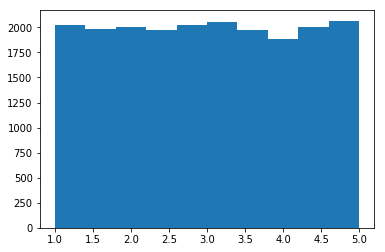

In [33]:
## Generate a 20 by 10000 matrix from random numbers between 0 and 1
## Then, plot a histogram of the distribution of random numberrs
x = np.random.uniform(1, 5, (20,1000))
plt.hist(np.ravel(x))

In [ ]:
## Generate a 5 by 2 matrix whose elements are Gaussian random numbers 0 to 1 
# Run multiple times
np.random.randn(5,2)

In [ ]:
## Generate a 5 by 2 matrix whose elements are Gaussian random numbers 0 to 1 
## Use a random seed and run multiple times
np.random.seed(2020)
np.random.randn(5,2)

In [ ]:
## Plot a histogram of 10000 Gaussian random number
plt.hist(np.random.randn(10000))
plt.show()

In [ ]:
data = np.random.rand(20, 20)
plt.imshow(data, cmap=plt.cm.hot, interpolation='none')
plt.colorbar()

In [ ]:
## Generate a 100 by 3 matrix with random intergers from 1 to 6
casts = np.random.randint(1, 7, (100, 3))
plt.hist(casts, np.linspace(0.5, 6.5, 7))

In [ ]:
height = np.round(np.random.normal(1.75, 0.2, 20),2)
weight = np.round(np.random.normal(68.32, 15, 20),2)


In [ ]:
np_height_weight_col = np.column_stack((height, weight))
print(np_height_weight_col)

In [ ]:
np_height_weight_row = np.row_stack((height, weight))
print(np_height_weight_row)

In [ ]:
np.concatenate((height, weight))

In [ ]:
np.vstack((height, weight))

In [ ]:
np.hstack((height, weight))

In [ ]:
x = np.random.choice([3, 5, 7, 9], p=[0.1, 0.2, 0.3, 0.4], size=(1000))

In [ ]:
plt.hist(x,bins=10)

In [ ]:
x = np.random.choice([3, 5, 7, 9], size=(3, 5))
print(x)

In [ ]:
## Compare random.shuffle() versus random.permutation()

In [34]:
arr1 = np.array([1, 2, 3, 4, 5])
np.random.shuffle(arr1)
#print(arr1, arr2)
print(arr1)

[2 5 1 4 3]


In [35]:
arr2 = np.array([6, 7, 8, 9, 10])
np.random.permutation(arr2)
print(arr2)

[ 6  7  8  9 10]


In [36]:
arr3 = np.random.permutation(arr2)
print(arr3)

[10  9  6  7  8]


In [ ]:
## Bernouli trials

In [37]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0


    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number<p:
            n_success +=1

    return n_success

C:\Users\kimso\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


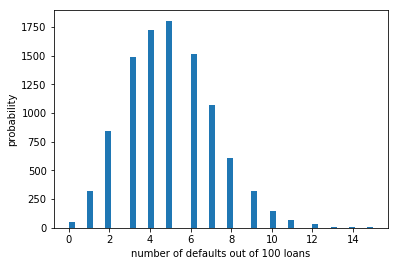

In [38]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(10000)

# Compute the number of defaults
for i in range(10000):
    n_defaults[i] = perform_bernoulli_trials(100,0.05)


# Plot the histogram with default number of bins; label your axes
#_ = plt.hist(n_defaults, normed=True)
_ = plt.hist(n_defaults,bins=50)

_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()


In [42]:
np.empty(100)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [40]:
np.zeros(100)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
## Binomial distribution

In [46]:
n_defaults = np.random.binomial(100,0.05,10000)
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 2) - 0.5
print(bins)

[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5
 13.5 14.5 15.5 16.5]


C:\Users\kimso\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


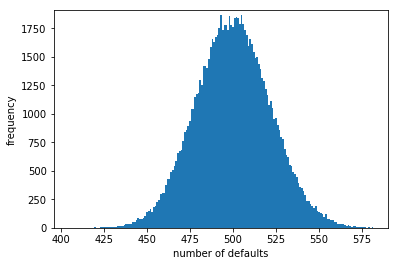

In [50]:
n_defaults = np.random.binomial(10000,0.05,100000)
# Compute bin edges: bins
bins = np.arange(400, max(n_defaults) + 2) - 0.5

# Generate histogram
plt.hist(n_defaults,bins=bins)

# Set margins
plt.margins(0.02)

# Label axes
plt.xlabel('number of defaults')
plt.ylabel('frequency')

# Show the plot
plt.show()


In [ ]:
## Poisson Distribution

In [61]:
## Relationship between binomial and Poisson

# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(16,100000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

Poisson:      15.99613 4.0069982559392265


(array([4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.800e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 8.300e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        1.890e+02, 0.000e+00, 0.000e+00, 0.000e+00, 3.580e+02, 0.000e+00,
        0.000e+00, 0.000e+00, 6.330e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 8.610e+02, 0.000e+00, 0.000e+00, 0.000e+00, 1.146e+03,
        0.000e+00, 0.000e+00, 0.000e+00, 1.271e+03, 0.000e+00, 0.000e+00,
        0.000e+00, 1.278e+03, 0.000e+00, 0.000e+00, 0.000e+00, 1.130e+03,
        0.000e+00, 0.000e+00, 0.000e+00, 9.040e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 7.800e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        4.910e+02, 0.000e+00, 0.000e+00, 0.000e+00, 3.480e+02, 0.000e+00,
        0.000e+00, 0.000e+00, 2.220e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        1.260e+02, 0.000e+00, 0.000e+00, 0.000e+00, 6.700e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.700e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 2.300e+01, 0.000e+0

C:\Users\kimso\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


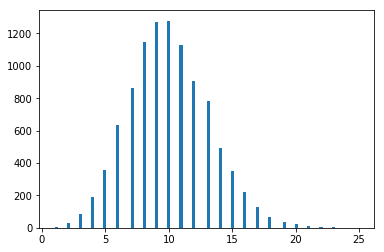

In [53]:
plt.hist(samples_poisson,100)

In [62]:
# Specify values of n and p to consider for Binomial: n, p
n = [10,50,500]
p = [0.5, 0.1, 0.01]

[3 1 5 ... 2 7 3]
n = 10 Binom: 5.0056 1.5730126000766809
[6 3 2 ... 8 4 7]
n = 50 Binom: 4.9827 2.13780277621674
[7 3 4 ... 4 2 2]
n = 500 Binom: 5.0336 2.2323689300830187


C:\Users\kimso\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


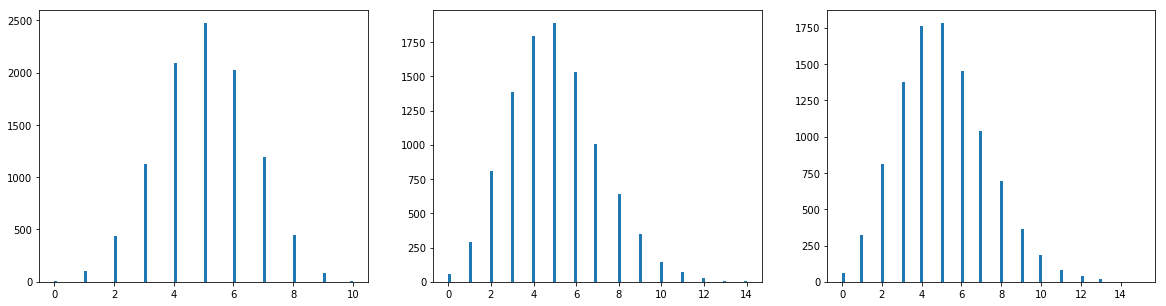

In [63]:
plt.figure(figsize=(20,5))
# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i],p[i],10000)
    plt.subplot(1,3,i+1)
    plt.hist(samples_binomial, 100)
    # Print results
    print(samples_binomial)
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

## Central Limit Theorem (CLT)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


In [ ]:
# 1000 simulations of die roll
n = 20

# In each simulation, there is one trial more than the previous simulation
def clt(ntrials):
    avg = []
    for _ in range(10000):
        a = np.random.randint(1,7,ntrials).mean()
        avg.append(a)
    return avg

In [ ]:
#ntrials_list = np.asarray(np.logspace(0, 4, 5, base=10),dtype=int)
ntrials_list = [1, 2, 3, 5, 10, 20, 100]
plt.figure(figsize=(40,5))
for k, num in enumerate(ntrials_list):    
    plt.subplot(1,len(ntrials_list),k+1)
    plt.hist(clt(num), bins=20)

## Monte Carlo Method: approximating π from random numbers

Create an array of random numbers and determine the fraction of points with distance from the origin smaller than one. Determine an approximation for π.

In [ ]:
N = 10_000
inside = []
for _ in range(N):
    x = np.random.uniform(-1, 1)
    y = np.random.uniform(-1, 1)
    if np.sqrt(x**2 + y**2) < 1:
        inside.append((x, y))

C:\Users\kimso\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


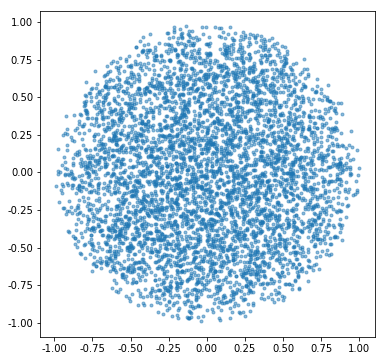

In [6]:
plt.figure(figsize=(6, 6))
plt.scatter([xy[0] for xy in inside], [xy[1] for xy in inside], marker=".", alpha=0.5);

In [ ]:
pi_estimated = 4 * len(inside)/float(N)

In [ ]:
## Law of large numbers
## Estimate pi from Monte Carlo simuation with increasing number of N from 0 to 1000000
## Then, visualize the errors between the estimates and the real value of pi

C:\Users\kimso\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


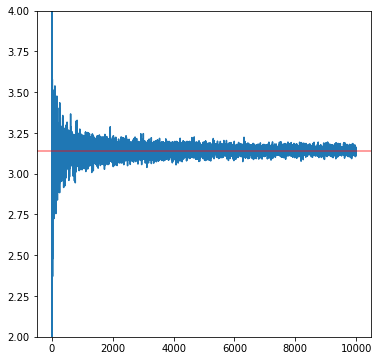

In [2]:
def pi_n(N):
    inside = []
    for _ in range(N):
        x = np.random.uniform(-1, 1)
        y = np.random.uniform(-1, 1)
        if np.sqrt(x**2 + y**2) < 1:
            inside.append((x, y))
    return 4* len(inside) / float(N)

y=[]
for i in range(1,10000):
    y.append(pi_n(i))

x=range(len(y))
plt.figure(figsize=(6, 6))
plt.ylim(2,4)
plt.plot(x,y)

plt.axhline(np.pi, color="r", alpha=0.5);

**Exercise**: let’s check that the error decreases proportionally to $\frac{1}{\sqrt{N}}$.

C:\Users\kimso\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


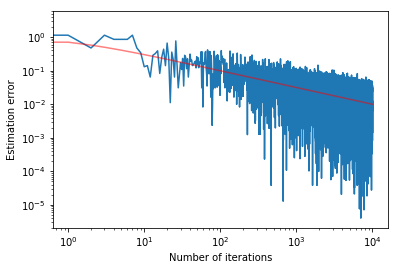

In [3]:
approximation=np.array(y)
plt.loglog(np.arange(len(approximation)), np.abs(approximation-np.pi))
plt.loglog(1/np.sqrt(np.arange(len(approximation))+1), color="r", alpha=0.5)
plt.xlabel("Number of iterations")
plt.ylabel("Estimation error");

In [ ]:
## Increase number of points (npts) from 100 to 1e8 with logarithmic scale (100, 1000, 1e4,...1e8)
## Show that the approximate becomes more accurate with larger number of points
#pi_approx = np.zeros(7)
#npts_list = np.logspace(2, 8, 7, base=10)
#for i, npts in enumerate(npts_list):
#    pts = np.random.rand(2*int(npts)).reshape(2, -1)
#    pi_approx[i] = 4*np.count_nonzero(np.hypot(pts[0], pts[1]) < 1)/int(npts)

## Increase number of points (npts) from 100 to 1e8 with logarithmic scale (100, 1000, ##1e4,...1e8)
## Show that the approximate becomes more accurate with larger number of points
#pi_approx = np.zeros(7)
#npts_list = np.logspace(2, 8, 7, base=10)
#for i, npts in enumerate(npts_list):
#    pts = np.random.rand(2*int(npts)).reshape(2, -1)
#    pi_approx[i] = 4*np.count_nonzero(np.hypot(pts[0], pts[1]) < 1)/int(npts)


**Exercise**: use a similar Monte Carlo procedure in dimension 3 to estimate $\pi$ (your analysis will be based on the volume of a sphere of radius 1, instead of the area of a circle of radius 1). Recall that the volume of a sphere of radius $r$ is $\frac{4}{3}\pi r^3$.

C:\Users\kimso\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


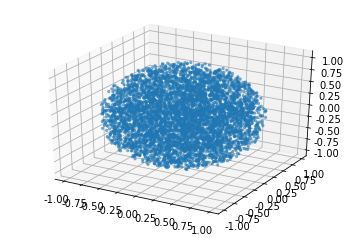

In [22]:
from mpl_toolkits.mplot3d import Axes3D
N = 10_000
inside = []
for _ in range(N):
    x = np.random.uniform(-1, 1)
    y = np.random.uniform(-1, 1)
    z = np.random.uniform(-1,1)
    if np.sqrt(x**2 + y**2+z**2) < 1:
        inside.append((x, y, z))
plt.figure(figsize=(6,6))
fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter([xyz[0] for xyz in inside], [xyz[1] for xyz in inside],[xyz[2] for xyz in inside], marker=".", alpha=0.5);

In [23]:
estimated_pi3 = (3/4)*8* len(inside)/float(N)
print(estimated_pi3)

3.1488


C:\Users\kimso\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


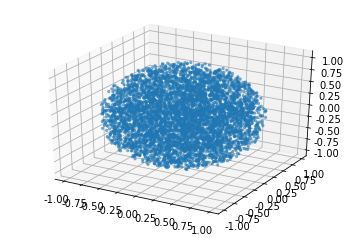

In [24]:
plt.figure(figsize=(6,6))
fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter([xyz[0] for xyz in inside], [xyz[1] for xyz in inside],[xyz[2] for xyz in inside], marker=".", alpha=0.5);